<a href="https://colab.research.google.com/github/Cirediallo/Models/blob/main/Copie_de_Coding_Challenge_for_Fatima_Fellowship_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fatima Fellowship Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. These coding challenges are not meant to take too long, do NOT spend more than 4-6 hours on them -- you can submit whatever you have.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 1. Deep Learning for Vision

**Generated by AI detector**: Train a model to detect if images are generated by AI

* Find a dataset of natural images and images generated by AI (here is one such dataset on the [Hugging Face Hub](https://huggingface.co/datasets/competitions/aiornot) but you're welcome to use any dataset you've found.
* Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify the image as being generated by an AI or not until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [2]:
!pip install transformers
!pip install datasets
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 14.4 MB/s eta 0:00:0

In [3]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import datasets
import time
import copy
import gc
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torch.utils.data import Dataset
from io import BytesIO

In [5]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE
from datasets import load_dataset

dataset = load_dataset('competitions/aiornot')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/competitions___parquet/competitions--aiornot-759454878caed5d9/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
print(dataset)

DatasetDict({
    test: Dataset({
        features: ['id', 'image', 'label'],
        num_rows: 43442
    })
    train: Dataset({
        features: ['id', 'image', 'label'],
        num_rows: 18618
    })
})


In [29]:
print(dataset['train'][12]['image'].size)

(512, 512)


Remove the `id` column

In [ ]:
#dataset = dataset.remove_columns('id')
#print(dataset)

In [55]:
minibatchsize = 32
"""
transform = transforms.Compose(
    [transforms.Pad(2),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
"""
transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
# define the set of class names :
classes = range(0,2)
nb_classes = len(classes)
print(nb_classes)

2


### Class to apply transform on dataset

In [56]:
# Convert dataset to PyTorch dataset
class AiornotDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform
          
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Load image
        img_byte = BytesIO(self.dataset[idx]['image'].tobytes())
        img = self.dataset[idx]['image']
        # Apply transform
        if self.transform:
            img = self.transform(img)
        
        # Load label
        label = self.dataset[idx]['label']
        
        return img, label

In [8]:
trainset = AiornotDataset(dataset['train'], transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=minibatchsize,
                                          shuffle=True, num_workers=0)


testset = AiornotDataset(dataset['test'], transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = minibatchsize, 
                                         shuffle=True, num_workers = 0)


In [57]:
from torch.utils.data.sampler import SubsetRandomSampler

validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
trainset_validation = AiornotDataset(dataset['train'], transform = transform)
dataset_size = len(trainset_validation)

indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
print("split: ", split)
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

print("length train: ", len(train_indices), "train indices: ", train_indices)
print("length validation: ", len(val_indices), "validation indices: ", val_indices)

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

trainloader = torch.utils.data.DataLoader(trainset_validation, batch_size=minibatchsize,
                                          sampler = train_sampler, num_workers=0)

validationloader = torch.utils.data.DataLoader(trainset_validation, batch_size=minibatchsize,
                                          sampler = valid_sampler, num_workers=0)

split:  3723
length train:  14895 train indices:  [15769, 4894, 12430, 7728, 280, 10228, 18448, 17736, 15371, 12746, 9895, 12233, 10423, 1643, 3314, 4265, 11882, 1889, 1270, 14106, 12163, 10895, 3594, 16005, 11449, 18125, 2996, 5545, 9558, 9530, 1796, 16228, 16778, 14029, 11054, 3193, 9398, 17024, 18456, 16461, 4653, 575, 10502, 1352, 17762, 13017, 14733, 10538, 9191, 9674, 11723, 17923, 505, 2857, 5514, 7934, 15274, 7946, 11370, 7822, 8372, 2111, 6195, 18471, 5998, 6550, 7224, 11162, 8727, 5787, 16679, 4441, 5597, 3421, 610, 5058, 6497, 14220, 10429, 8722, 15702, 7109, 6462, 8299, 9185, 8499, 17294, 13714, 15335, 3989, 17971, 3920, 17584, 9754, 7386, 8538, 9869, 2919, 3501, 8827, 12110, 17946, 7327, 9138, 9857, 17486, 13212, 8129, 7120, 6945, 14147, 16150, 3315, 7391, 14652, 15331, 4785, 10584, 6388, 18486, 2216, 6504, 8288, 7803, 9255, 3269, 18163, 1127, 15682, 4822, 1799, 5386, 14462, 12281, 16820, 4634, 5466, 15162, 11642, 2034, 12454, 10888, 4762, 12227, 13600, 15664, 11698, 13933

In [58]:
testset = AiornotDataset(dataset['test'], transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = minibatchsize, 
                                         shuffle=True, num_workers = 0)

In [59]:
print(testset[0][0].shape)

torch.Size([3, 224, 224])


In [9]:
print(len(trainset))
print(len(testset))

18618
43442


### Function to show images

###### Train set

<class 'torch.Tensor'>
torch.Size([3, 454, 1810])


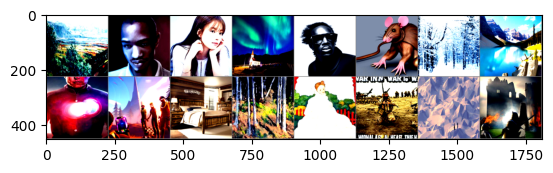

    0     0     0     0


In [60]:
# functions to show an image
def imshow(img, filename=''):
    print(type(img))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    # print shape
    print(img.shape)
    plt.show() 


train_show = torch.utils.data.DataLoader(trainset_validation, batch_size=16,
                                          shuffle=True, num_workers=0)
# get some random training images
dataiter = iter(train_show)

images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

###### Test set

<class 'torch.Tensor'>
torch.Size([3, 454, 1810])


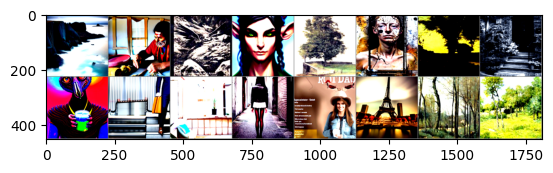

    1     1     1     1


In [61]:
test_show = torch.utils.data.DataLoader(testset, batch_size=16,
                                          shuffle=True, num_workers=0)
# get some random training images
dataiter = iter(test_show)

images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [62]:
#import torch 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [40]:
#import gc 

torch.cuda.empty_cache()
gc.collect()

6839

### Convolutional Neural Network

In [67]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        #self.fc1 = nn.Linear(in_features=262144, out_features=512)
        self.fc1 = nn.Linear(in_features=50176, out_features=512)
        self.relu4 = nn.ReLU()
        
        self.fc2 = nn.Linear(in_features=512, out_features=2)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        # Flatten
        x = x.reshape(x.shape[0], -1) #this work
        
        x = self.fc1(x)
        x = self.relu4(x)
        
        x = self.fc2(x)
        
        return x


In [68]:
# Define the network to use :
net = CNN() 

net.to(device) # move it to GPU or CPU

# show the structure :
print(net)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (relu4): ReLU()
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


### Hyper parameters

In [69]:
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

lr = 0.01

momentum = 0.9

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(net.parameters(), lr = 0.001)

### Train

> Long to train on CPU use GPU if accessible

In [70]:
epochs = 10
train_loss, val_loss = list(), list()
for epoch in range(epochs):
  start_time = time.time()
  total_train_loss = 0
  total_val_loss = 0

  net.train()
  for idx, (image, label) in enumerate(trainloader):
    image, label = image.to(device), label.to(device) # sent to the device
    optimizer.zero_grad()
    #print(image.shape)
    pred = net(image)

    loss = criterion(pred, label)
    total_train_loss += loss.item()

    loss.backward()
    optimizer.step()

  total_train_loss = total_train_loss / (idx + 1)
  train_loss.append(total_train_loss)
  #validation
  net.eval()
  total = 0

  for idx, (image, label) in enumerate(validationloader):
    image, label = image.to(device), label.to(device)
    pred = net(image)

    loss = criterion(pred, label)
    total_val_loss += loss.item()

    pred = torch.nn.functional.softmax(pred, dim= 1)
    """
    for i, p in enumerate(pred):
      if label[i] != -1: # added
        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim= 1)
        
        if label[i] == torch.max(p.data, 0)[1]:
          total += 1

    """
    # calculates the number of correct predictions made by a neural network for a single batch of data
    for i, p in enumerate(pred):
      # compare the predicted label 
      # (which is the index of the maximum value in the predicted output tensor,
      # obtained using torch.max(p.data, 0)[1]) to the true label (label[i])
      
      if label[i] == torch.max(p.data, 0)[1]: 
        total += 1 # number of correct predictions made by the model for the batch
    
  accuracy = total / len(val_indices)

  total_val_loss = total_val_loss / (idx + 1)
  val_loss.append(total_val_loss)

  best_model =  copy.deepcopy(net)
  print(f"Epoxh: {epoch} | Train loss: {total_train_loss} | accuracy: {accuracy}")

Epoxh: 0 | Train loss: 0.36209449055304854 | accuracy: 0.8831587429492345
Epoxh: 1 | Train loss: 0.23652402261200126 | accuracy: 0.8799355358581789
Epoxh: 2 | Train loss: 0.18455337772201827 | accuracy: 0.876443728176202
Epoxh: 3 | Train loss: 0.12474284128609708 | accuracy: 0.8823529411764706
Epoxh: 4 | Train loss: 0.06645482202168441 | accuracy: 0.8831587429492345
Epoxh: 5 | Train loss: 0.04198769639773782 | accuracy: 0.8777867311308085
Epoxh: 6 | Train loss: 0.03197754866667411 | accuracy: 0.8670427074939565
Epoxh: 7 | Train loss: 0.02575501544844118 | accuracy: 0.8713403169486973
Epoxh: 8 | Train loss: 0.02714167600018889 | accuracy: 0.8697287134031695
Epoxh: 9 | Train loss: 0.017344691659294486 | accuracy: 0.8759065269943593


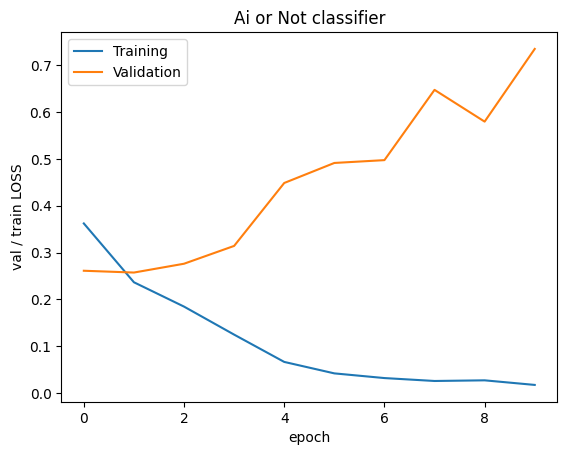

In [71]:
plt.clf()
plt.xlabel('epoch')
plt.ylabel('val / train LOSS')
plt.title('Ai or Not classifier')
plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(['Training', 'Validation'])

### Validation

### See predictions on few samples

<class 'torch.Tensor'>
torch.Size([3, 906, 1810])


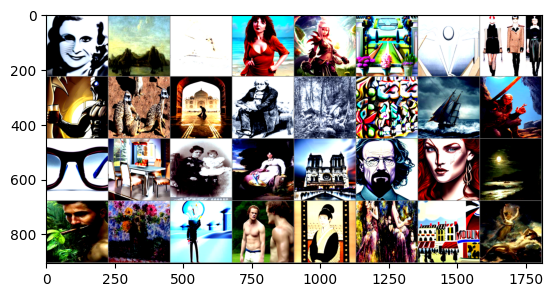

GroundTruth:      1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1
Predicted:      1     0     0     1     0     1     0     1     1     0     0     0     0     1     0     1     0     1     0     0     1     0     1     0     0     0     1     1     1     0     1     0


In [72]:
# first on few sample, just to see real results
dataiter = iter(testloader)
images_cpu, labels_cpu = next(dataiter)
images, labels = images_cpu.to(device), labels_cpu.to(device)
plt.clf()
imshow(torchvision.utils.make_grid(images_cpu))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(minibatchsize)))
# activate the net with these examples
outputs = best_model(images)

# get the maximum class number for each sample, but print the corresponding class name
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(minibatchsize)))

### Test on whole dataset to see the accuracy of the Network

In [73]:
# Test now  on the whole test dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = best_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 0 %


### Save the model

In [49]:
torch.save(best_model.state_dict(), "./best_model.nn")

### suggestions to improve the performance of the model

The strategy to improve a model performance 

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/datasets/sadikaljarif/fake-news-detection-dataset-english (if you'd like, you can also look at fake news datasets in other languages, which are available on the Huggingface Hub)
* Develop an NLP model for classification that uses a pretrained language model and the *text* of the article. It should *NOT* use the URL
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 3.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer


In [ ]:
dataset = load_dataset("mrm8488/fake-news")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/mrm8488___csv/mrm8488--fake-news-d4fd5c02f3284619/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(dataset)
print(dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 44898
    })
})
{'text': 'The Trump administration has been getting absolutely pummeled for its refusal to acknowledge climate change, even as it becomes more obvious in our surroundings.On Monday, CNN s Jim Acosta tore Trump s Homeland Security advisor, Tom Bossert, apart in front of everyone for the administration s ignorance. Acknowledging the fact that several massive hurricanes have been ravaging the United States, Acosta cornered Bossert, asking him if Trump and his administration  saw a connection between climate change and homeland security and that the frequency and intensity of powerful storms like Harvey and Irma can pose a problem for future administrations  and if the storms were  giving the administration some pause when it comes to the issue of climate change and homeland security. Bossert was almost beside himself as he said: Causality s something outside of my ability to analyze r

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base-mnli")

def tokenization(element):
  return tokenizer(element["text"], padding="max_length", truncation=True)

tokenized_dataset =dataset.map(tokenization, batched = True)

Map:   0%|          | 0/44898 [00:00<?, ? examples/s]

A big subset crash the colab so I reduce it to 1000 for each subset (don't resolve the issue though)
> Note that the dataset doesn't have ***test*** set so both train and test are derived from the trainset 

In [ ]:
small_train_dataset = tokenized_dataset["train"].select(range(1000))
small_eval_dataset = tokenized_dataset["train"].select(range(1000,2000))
print(len(small_train_dataset))
print(len(small_eval_dataset))

1000
1000


**Training using Trainer**

In [ ]:

model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-base-mnli", num_labels=2, ignore_mismatched_sizes=True)

Some weights of the model checkpoint at microsoft/deberta-base-mnli were not used when initializing DebertaForSequenceClassification: ['config']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base-mnli and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3])

In [ ]:
import numpy as np
import evaluate
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer", overwrite_output_dir= True)

metric = evaluate.load("accuracy")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs = 1)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
torch.cuda.empty_cache(),
gc.collect(),

(3493,)

> **THIS PART CRASH EVEN AFTER REDUCING THE TRAINING SET ET SET THE *num_train_epochs* parameter to *1* AND IF CONNECTED TO A GPU ENVIRONMENT I HAVE THE ERROR*** 
```OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 14.75 GiB total capacity; 13.60 GiB already allocated; 92.81 MiB free; 13.65 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF```

In [ ]:
trainer.train()

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

[Please put your write up here]

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

[Please put your write up here]

In [ ]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?

[Please put your write up here]

In [ ]:
with open("input.txt", "r") as f:
    for line in f:
        parts = line.strip().split()
        filename = parts[0] + ".txt"
        text = " ".join(parts[1:])
        with open(filename, "w") as out_file:
            out_file.write(text)